# Logistic Regression Airline Customer Satisfaction Prediction

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\saipr\\Downloads\\Airline_customer_satisfaction.csv\\Airline_customer_satisfaction.csv")

In [3]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df=df.drop(columns='Arrival Delay in Minutes',axis=0)

In [7]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,5,2,2,3,3,4,4,4,2,0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,1,3,2,3,3,1,2,1,174
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,2,4,4,3,4,2,3,2,155
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,2,3,3,2,3,2,1,2,193


In [8]:
df = pd.get_dummies(df, columns=['Customer Type', 'Type of Travel', 'Class'])

In [9]:
df

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Cleanliness,Online boarding,Departure Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,3,2,0,True,False,False,True,False,True,False
1,satisfied,47,2464,0,0,0,3,0,2,2,...,3,2,310,True,False,False,True,True,False,False
2,satisfied,15,2138,0,0,0,3,2,0,2,...,4,2,0,True,False,False,True,False,True,False
3,satisfied,60,623,0,0,0,3,3,4,3,...,1,3,0,True,False,False,True,False,True,False
4,satisfied,70,354,0,0,0,3,4,3,4,...,2,5,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,29,1731,5,5,5,3,2,5,2,...,4,2,0,False,True,False,True,False,True,False
129876,dissatisfied,63,2087,2,3,2,4,2,1,1,...,2,1,174,False,True,False,True,True,False,False
129877,dissatisfied,69,2320,3,0,3,3,3,2,2,...,3,2,155,False,True,False,True,False,True,False
129878,dissatisfied,66,2450,3,2,3,2,3,2,2,...,1,2,193,False,True,False,True,False,True,False


In [10]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

In [11]:
df

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Cleanliness,Online boarding,Departure Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,3,2,0,True,False,False,True,False,True,False
1,1,47,2464,0,0,0,3,0,2,2,...,3,2,310,True,False,False,True,True,False,False
2,1,15,2138,0,0,0,3,2,0,2,...,4,2,0,True,False,False,True,False,True,False
3,1,60,623,0,0,0,3,3,4,3,...,1,3,0,True,False,False,True,False,True,False
4,1,70,354,0,0,0,3,4,3,4,...,2,5,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,3,2,5,2,...,4,2,0,False,True,False,True,False,True,False
129876,0,63,2087,2,3,2,4,2,1,1,...,2,1,174,False,True,False,True,True,False,False
129877,0,69,2320,3,0,3,3,3,2,2,...,3,2,155,False,True,False,True,False,True,False
129878,0,66,2450,3,2,3,2,3,2,2,...,1,2,193,False,True,False,True,False,True,False


<Axes: xlabel='satisfaction', ylabel='count'>

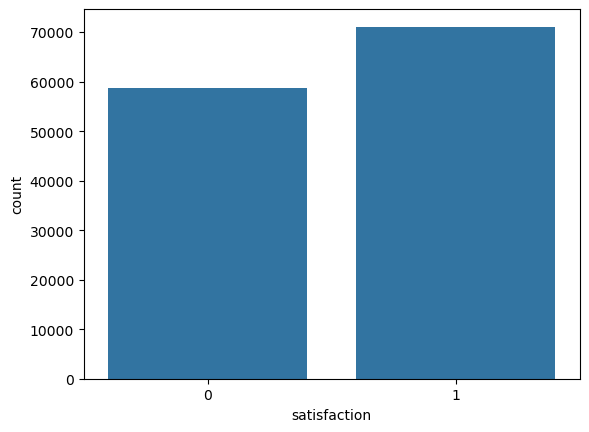

In [12]:
sns.countplot(x='satisfaction',data=df)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

# Predictions

In [ ]:
redictions=logmodel.predict(X_test)

In [39]:
predictions

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [40]:
#orginal values
y_test

103044    1
43282     0
65543     1
65083     1
76496     0
         ..
32347     0
123061    1
74700     0
54997     0
107396    1
Name: satisfaction, Length: 38964, dtype: int64

# Evaluation

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     17554
           1       0.84      0.84      0.84     21410

    accuracy                           0.83     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.83      0.83      0.83     38964



In [43]:
print(confusion_matrix(y_test,predictions))

[[14210  3344]
 [ 3443 17967]]
